In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
mpg |> head()

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [3]:
median_values = mpg |> 
    group_by(class) |> 
    summarize(med_city = median(cty))
median_values |> head()

class,med_city
<chr>,<dbl>
2seater,15
compact,20
midsize,18
minivan,16
pickup,13
subcompact,19


[1] "suv"        "pickup"     "2seater"    "minivan"    "midsize"   
[6] "subcompact" "compact"

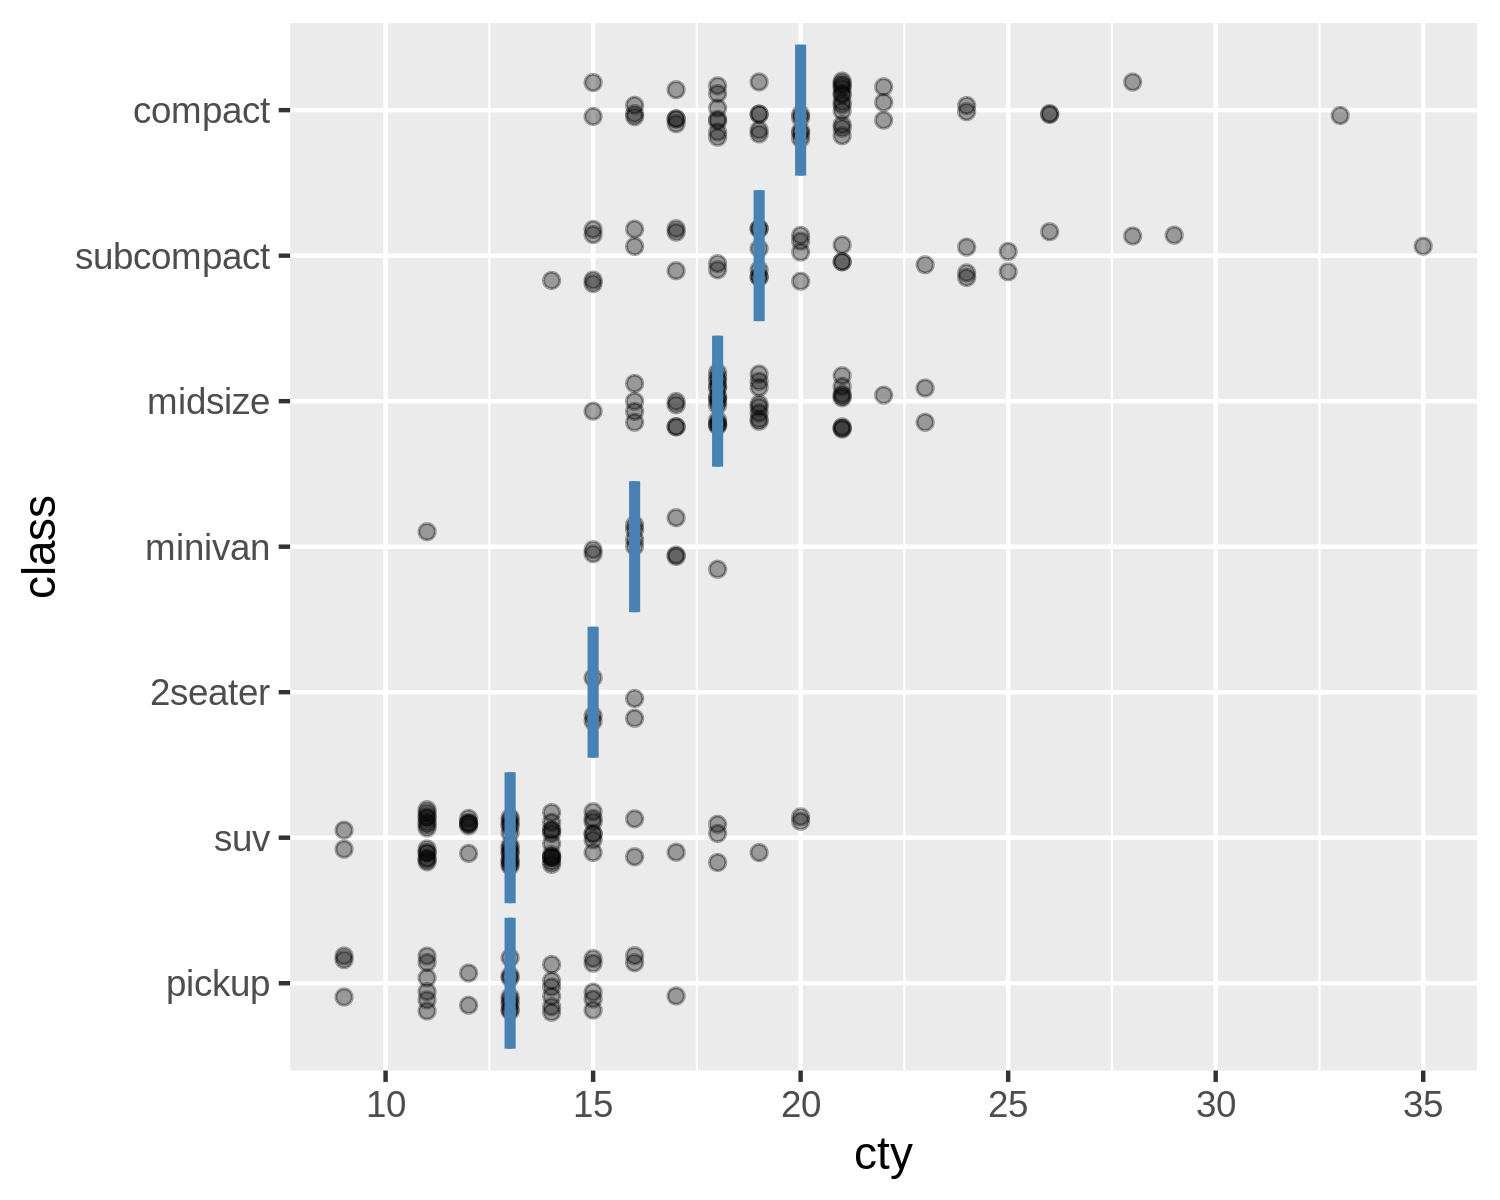

In [15]:
median_values = mpg |>
    group_by(class) |>
    summarize(cty = median(cty))

#mpg2 = mpg |>
    #mutate(class = fct_reorder(class, cty, .fun = median))
#OR 

mpg2 |> 
    group_by(class) |>
    mutate(cty_median = median(cty))|>
    ungroup() |>
    arrange (cty_median) |> 
    mutate(class = fct_inorder (class)) |> 
    pull(class) |> levels()

p = ggplot(mpg2, aes(x = cty, y = class)) +
    geom_point(alpha = 0.35, position = position_jitter(height = 0.2, width = 0)) +
    geom_crossbar(color = 'steelblue', 
                  data = median_values, mapping = aes(xmin = cty, xmax = cty))

p

In [13]:
mpg2 |> 
    group_by(class) |>
    mutate(cty_median = median(cty))|>
    ungroup() |>
    arrange (cty_median) |> 
    mutate(class = fct_inorder (class)) |> 
    pull(class) |> levels()

[1] "suv"        "pickup"     "2seater"    "minivan"    "midsize"   
[6] "subcompact" "compact"

Re-create the following figure using the `mpg` data set.

<img src="figs/example.png" style="width: 600px;" />

Hints:
- you can make a table with median values using `group_by` and `summarize`
- use `geom_crossbar` to create the vertical line for median values
- use `fct_reorder` to set the levels for `class`